# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, norm, t
from scipy.stats import f_oneway
from scipy.stats import sem
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel
from statsmodels.stats.proportion import proportions_ztest
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm



Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
print(student_data.head())

   Age  Tardies
0   17       10
1   51        1
2   27        5
3   21        9
4   36        4


Draw a dispersion diagram (scatter plot) for the data.

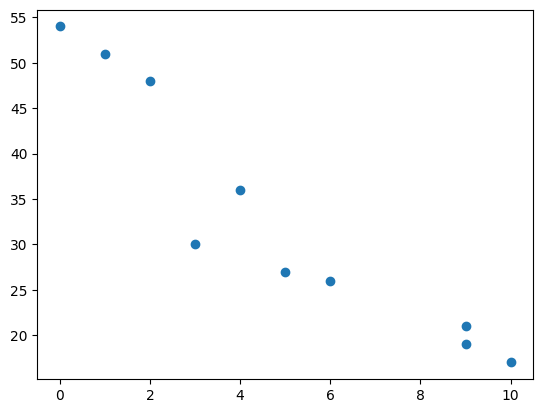

In [4]:
plt.scatter(x=student_data['Tardies'], y=student_data['Age'])
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Yes, I do see a trend. The oldest person was never late, the trend undermines the hypothesis that the younger the people are, the more often they are late.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
covariance_student_tardies = np.cov(student_data['Age'], student_data['Tardies'])
print(f"The covariance is: {covariance_student_tardies}")

correlation_student_tardies = np.corrcoef(student_data['Age'], student_data['Tardies'])
print(f"The correlation is: {correlation_student_tardies}")

# The negative covariance and strong negative correlation show that older students tend to have fewer tardies. 
# The correlation value (-0.939) suggests a linear relationship, meaning the age is closely associated with the number of tardies.

The covariance is: [[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]
The correlation is: [[ 1.         -0.93916269]
 [-0.93916269  1.        ]]


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

Intercept: 13.46408839779005
Coefficient: -0.26657458563535896


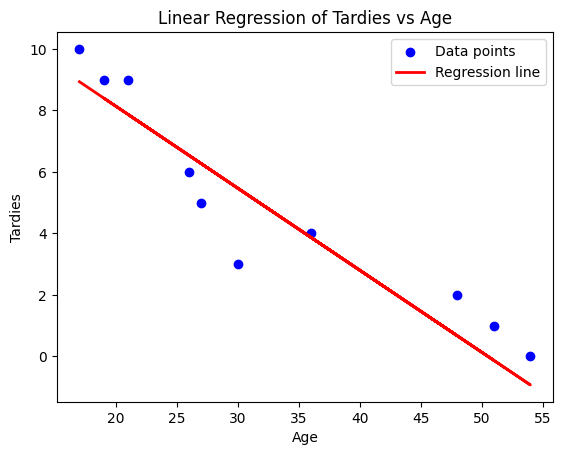

In [6]:
X = student_data[['Age']]  
y = student_data['Tardies']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Print the model's coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Visualizing the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression line')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Linear Regression of Tardies vs Age')
plt.legend()
plt.show()


# Since it shows a linear relationship I was using a linear regression model.

Plot your regression model on your scatter plot.

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [7]:
data = {'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]}
student_df = pd.DataFrame(data)

# Function to perform t-test across features
def t_test_student_data(df):
    # Perform the t-test between 'Age' and 'Tardies'
    t_stat, p_value = ttest_ind(df['Age'], df['Tardies'], equal_var=False)
    return f"{p_value:.4f}"

# Perform the t-test on the DataFrame 'student_df'
p_value = t_test_student_data(student_df)

# Print the results
print(f"The p-value of the t-test is: {p_value}")

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

The p-value of the t-test is: 0.0001
Mean Squared Error: 1.073148141082379
R-squared: -3.2925925643295164


*The confididence interval with which I could say that I could predict the tardiness is not very high. So yes, there's a correlation, 
anyways you couldn't predict the tardiness by age with a high confidence.*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [8]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('/Users/julianuss/Documents/GitHub/lab-regression-analysis-en/vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [9]:
correlation_vehicles_year_co2_emission = np.corrcoef(vehicles['Year'], vehicles['CO2 Emission Grams/Mile'])
print(f"The correlation between Year and CO2 Emission Grams per Mile is: {correlation_vehicles_year_co2_emission}")

correlation_vehicles_cylinders_co2_emission = np.corrcoef(vehicles['Cylinders'], vehicles['CO2 Emission Grams/Mile'])
print(f"The correlation between Cylinders and CO2 Emission Grams per Mile is: {correlation_vehicles_cylinders_co2_emission}")

correlation_vehicles_fuelbarrels_co2_emission = np.corrcoef(vehicles['Fuel Barrels/Year'], vehicles['CO2 Emission Grams/Mile'])
print(f"The correlation between Fuel Barrels/Year and CO2 Emission Grams per Mile is: {correlation_vehicles_fuelbarrels_co2_emission}")

correlation_vehicles_combinedmpg_co2_emission = np.corrcoef(vehicles['Combined MPG'], vehicles['CO2 Emission Grams/Mile'])
print(f"The correlation between Combined MPG and CO2 Emission Grams per Mile is: {correlation_vehicles_combinedmpg_co2_emission}")

correlation_vehicles_fuelcost_co2_emission = np.corrcoef(vehicles['Fuel Cost/Year'], vehicles['CO2 Emission Grams/Mile'])
print(f"The correlation between Fuel Cost/Year and CO2 Emission Grams per Mile is: {correlation_vehicles_fuelcost_co2_emission}")


# Answer: The biggest correlation of CO2 Emission is with Fuel Barrels per Year. So the Fuel Barrels needed per year tell us the most about the
# CO2 Emission of a vehicle. The smallest correlation is with the Year, so the year is the least helpful infomation determining the CO2 emissions.

The correlation between Year and CO2 Emission Grams per Mile is: [[ 1.        -0.2222996]
 [-0.2222996  1.       ]]
The correlation between Cylinders and CO2 Emission Grams per Mile is: [[1.         0.75239255]
 [0.75239255 1.        ]]
The correlation between Fuel Barrels/Year and CO2 Emission Grams per Mile is: [[1.         0.98618866]
 [0.98618866 1.        ]]
The correlation between Combined MPG and CO2 Emission Grams per Mile is: [[ 1.         -0.92622904]
 [-0.92622904  1.        ]]
The correlation between Fuel Cost/Year and CO2 Emission Grams per Mile is: [[1.         0.93086515]
 [0.93086515 1.        ]]


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [10]:
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]  
y = vehicles['CO2 Emission Grams/Mile']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Evaluation
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")


# Print the model's coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Mean Squared Error: 289.8277440813779
R-squared: 0.9794542628636334
Intercept: 755.6935073143609
Coefficient: -0.3155867545879087


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [11]:
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                             16:57:02   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [12]:
# The low p-values show the high significance of the effects on CO2 emissions. They tell us we can say with a high confidence that the features do have a
# correlation with the CO2 emission.
# The coefficient tells us how high or low this correlation is. The high coefficient of Fuel Barrels/Year tells us that the correlation between the 
# Fuel Barrels/Year and the CO2 emission is the highest. The Year has a negative coefficient and suggests that newer vehicles emit less CO2.

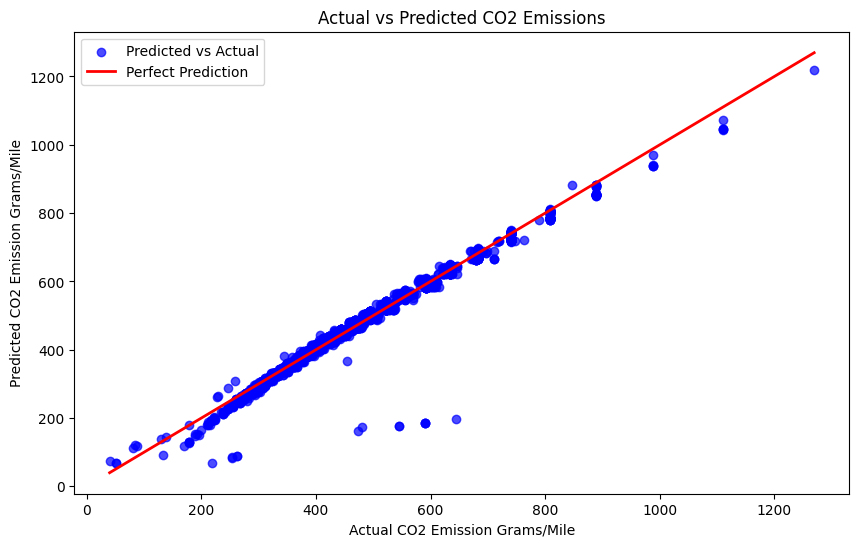

In [13]:
def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')
    plt.xlabel('Actual CO2 Emission Grams/Mile')
    plt.ylabel('Predicted CO2 Emission Grams/Mile')
    plt.title('Actual vs Predicted CO2 Emissions')
    plt.legend()
    plt.show()

# Assuming you have y_test and y_pred from your regression model
plot_actual_vs_predicted(y_test, y_pred)

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [14]:
party_stats = pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11, 14], 'Y': [1, 2, 4, 4, 5, 7, 8, 13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

Intercept: -0.38023952095808244
Coefficient: 0.8473053892215567


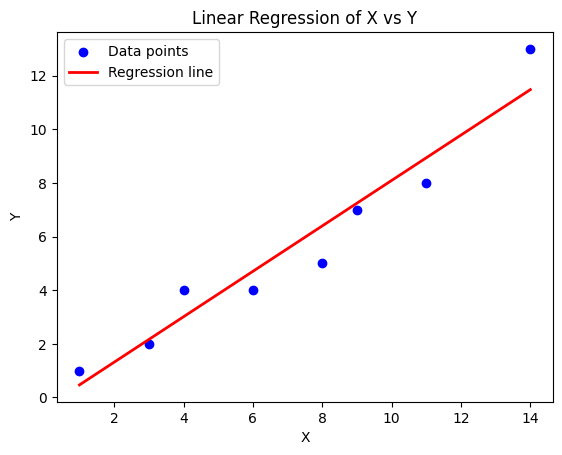

In [15]:
X = party_stats[['X']]  
y = party_stats['Y']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Print the model's coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Visualizing the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression of X vs Y')
plt.legend()
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*I see that there is a linear regression which means the more people you invite, the more people will come.*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

Intercept: 0.8630136986301364
Coefficient: 0.6232876712328768


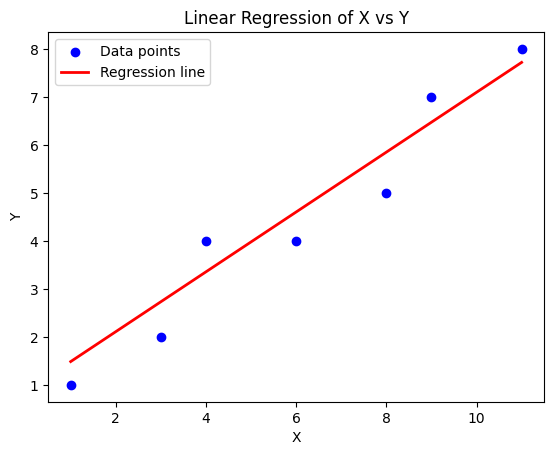

In [16]:
# One outlier might be the 14 invited, 13 coming tho the party, but it doesn't seem like so much of an outlier to me.

# Anyways I will remove it and recalculate.

party_stats = pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11], 'Y': [1, 2, 4, 4, 5, 7, 8]})

X = party_stats[['X']]  
y = party_stats['Y']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Print the model's coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Visualizing the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression of X vs Y')
plt.legend()
plt.show()


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*After having removed the outlier the regression line is a lot more accurate and the errors are far smaller. The problematic point/outlier can mislead the whole
interpretation and by removing it the results can be interpreted with higher reliability.*